## 1. Daum NEWS를 이용해 뉴스기사 100개 수집
- hint: 실습 3주차 API관련 파일 참고
- url: https://finance.daum.net/quotes/A105560#news/stock
- url: https://finance.daum.net/content/news?page=1&perPage=20&category=economy&searchType=all&keyword=A105560&pagination=true

In [1]:
import requests
import pprint
import json

In [3]:
url = "https://finance.daum.net/content/news?page=1&perPage=100&category=economy&searchType=all&keyword=A105560&pagination=true"
headers = {
    "referer": "https://finance.daum.net/quotes/A105560",
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
res = requests.get(url,headers=headers)
data = json.loads(res.text)['data']





In [4]:
pprint.pprint(data)

[{'cpKorName': '한국경제',
  'createdAt': '2019-10-25 18:36:10',
  'imageUrl': 'https://t1.daumcdn.net/news/201910/25/ked/20191025183616773kvnu.jpg',
  'keywords': ['거래소', '기관', '순매도상위', '화학업종', '레버리지'],
  'newsId': 'NCiJxeLONe',
  'summary': '기관 투자자는 25일 거래소에서 두산솔루스, KODEX 코스닥150 레버리지, LG생활건강 등을 중점적으로 매도한 '
             '것으로 나타났다. 기관 투자자의 순매도 상위 20개 종목은 두산솔루스, KODEX 코스닥150 레버리지, '
             'LG생활건강, POSCO, 현대제철, SK하이닉스, 롯데케미칼, LG전자, S-Oil, KB금융등이다. 이중에 화학 '
             '업종에 속한 종목이 4',
  'title': '25일, 거래소 기관 순매도상위에 화학 업종 4종목',
  'updatedAt': '2019-10-25 18:36:10'},
 {'cpKorName': '한국경제',
  'createdAt': '2019-10-25 18:36:09',
  'imageUrl': 'https://t1.daumcdn.net/news/201910/25/ked/20191025183612751wbtm.jpg',
  'keywords': ['삼성전자', '외국인', '거래소', '순매도', '현대모비스'],
  'newsId': 'NdQt4aXFeX',
  'summary': '외국인 투자자는 25일 거래소에서 POSCO, 삼성전자, KODEX 200 등을 중점적으로 매도한 것으로 나타났다. '
             '외국인 투자자의 순매도 상위 20개 종목은 POSCO, 삼성전자, KODEX 200, 현대모비스, SK텔레콤, '
             '삼성전자우, LG생활건강, KB금융, SK, TIG

  'newsId': 'No8mk7eqjW',
  'summary': "경제계 소식 알아보는 '비즈&' 시간입니다. 오늘은 어떤 소식들이 있는지 살펴보겠습니다. ▶ GS홈쇼핑, 故조양호 "
             '보유 한진 지분 6.87% 인수 GS홈쇼핑이 고 조양호 전 한진그룹 회장이 보유하던 주식회사 한진 지분 6.87%를 '
             '인수했습니다. 시간 외 대량매매인 블록딜 방식으로 투자 총액은 약 250억원입니다. GS 측은 사업환경 변화에 '
             '대처하기 위한',
  'title': '[비즈&] GS홈쇼핑, 故조양호 보유 한진 지분 6.87% 인수 外',
  'updatedAt': '2019-10-24 18:09:35'},
 {'cpKorName': '한국경제',
  'createdAt': '2019-10-24 18:08:51',
  'imageUrl': 'https://t1.daumcdn.net/news/201910/24/ked/20191024180852715edug.jpg',
  'keywords': ['행장', '허인', '국민은행', '연임', '선방'],
  'newsId': 'NCr7C2qA4E',
  'summary': '다음달 임기가 만료되는 허인 국민은행장이 향후 1년간 은행을 더 이끌게 됐다. 조직을 포용하면서 높은 실적을 유지한 '
             '공로를 그룹에서 인정받은 데 따른 것이다. 국민은행의 호실적에 힘입어 KB금융그룹은 지난 3분기 누적 '
             '2조7771억원의 이익을 냈다. 저금리 기조와 금융시장 침체로 열악한 상황에서도 전년 동기 수준의 실적을 유지해 '
             '‘선전했다’는 평가가 나온다',
  'title': '허인 국민銀 행장, 사실상 연임.."3분기 실적 선방"',
  'updatedAt': '2019-10-25 01:13:02'},
 {'cpKorName': '매일경제',
  'createdAt': '2019-10-24 1

In [5]:
len(data)

100

In [7]:
from bs4 import BeautifulSoup 
contents = []
for news in data:
    url = "https://finance.daum.net/content/news/"+news['newsId']

    headers = {
        "referer": "https://finance.daum.net/quotes/A105560",
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
    }
    res = requests.get(url,headers=headers)
    html_data = json.loads(res.text)['content']
    soup = BeautifulSoup(html_data, "html.parser")
    news_content = soup.find('div',{'id': 'dmcfContents'}).text
    contents.append(news_content)

contents[:2]

[' 기관 투자자는 25일 거래소에서 두산솔루스, KODEX 코스닥150 레버리지, LG생활건강 등을 중점적으로 매도한 것으로 나타났다.기관 투자자의 순매도 상위 20개 종목은 두산솔루스, KODEX 코스닥150 레버리지, LG생활건강, POSCO, 현대제철, SK하이닉스, 롯데케미칼, LG전자, S-Oil, KB금융등이다.이중에 화학 업종에 속한 종목이 4개 포함되어 있다.두산솔루스, SK하이닉스, S-Oil 등은 전일 대비 주가가 상승했고, KODEX 코스닥150 레버리지, LG생활건강, POSCO 등은 주가가 하락했다.[10월25일]거래소 기관 순매도 상위 종목한경로보뉴스이 기사는 한국경제신문과 금융 AI 전문기업 씽크풀이 공동 개발한 기사 자동생성 알고리즘에 의해 실시간으로 작성된 것입니다.▶ 네이버에서 한국경제 뉴스를 받아보세요▶ 한경닷컴 바로가기 ▶ 모바일한경 구독신청 ⓒ 한국경제 & hankyung.com, 무단전재 및 재배포 금지 ',
 ' 외국인 투자자는 25일 거래소에서 POSCO, 삼성전자, KODEX 200 등을 중점적으로 매도한 것으로 나타났다.외국인 투자자의 순매도 상위 20개 종목은 POSCO, 삼성전자, KODEX 200, 현대모비스, SK텔레콤, 삼성전자우, LG생활건강, KB금융, SK, TIGER 200등이다.이중에 금융업 업종에 속한 종목이 4개 포함되어 있다.삼성전자, KODEX 200, SK 등은 전일 대비 주가가 상승했고, POSCO, 현대모비스, SK텔레콤 등은 주가가 하락했다.[10월25일]거래소 외국인 순매도 상위 종목한경로보뉴스이 기사는 한국경제신문과 금융 AI 전문기업 씽크풀이 공동 개발한 기사 자동생성 알고리즘에 의해 실시간으로 작성된 것입니다.▶ 네이버에서 한국경제 뉴스를 받아보세요▶ 한경닷컴 바로가기 ▶ 모바일한경 구독신청 ⓒ 한국경제 & hankyung.com, 무단전재 및 재배포 금지 ']

## 2. 텍스트 데이터 전처리 후 형태소 분석 후 명사 기준 TF-IDF계산

In [8]:
from konlpy.tag import Okt
okt = Okt()
stops_words = []
with open('data/stopword.txt', encoding="utf-8") as f:
    for line in f.readlines():
        stops_words.append(line.strip())

POS_LIST = ["Noun"]
tokenized_sentence_list = []
for content in contents:
    tokens = []
    for pos in okt.pos(content):

        condition = pos[1] in POS_LIST and pos[0] not in stops_words
        if condition:
            tokens.append(pos[0])
    tokenized_sentence_list.append(tokens)



/Users/seojungwon/anaconda3/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [9]:
tokenized_sentence_list[:2]

[['기관',
  '투자자',
  '거래소',
  '두산',
  '솔',
  '루스',
  '코스닥',
  '레버리지',
  '생활',
  '건강',
  '중점',
  '매도',
  '기관',
  '투자자',
  '매도',
  '상위',
  '개',
  '종목',
  '두산',
  '솔',
  '루스',
  '코스닥',
  '레버리지',
  '생활',
  '건강',
  '현대',
  '제철',
  '하이닉스',
  '롯데',
  '케미칼',
  '전자',
  '금융',
  '이중',
  '화학',
  '업종',
  '속',
  '종목',
  '개',
  '포함',
  '두산',
  '솔',
  '루스',
  '하이닉스',
  '전일',
  '대비',
  '주가',
  '상승',
  '코스닥',
  '레버리지',
  '생활',
  '건강',
  '주가',
  '하락',
  '거래소',
  '기관',
  '매도',
  '상위',
  '종목',
  '경로',
  '보',
  '뉴스',
  '기사',
  '한국',
  '신문',
  '금융',
  '전문',
  '기업',
  '풀이',
  '공동',
  '개발',
  '기사',
  '자',
  '동생',
  '알고리즘',
  '실시간',
  '작성',
  '네이버',
  '한국',
  '경제',
  '뉴스',
  '한경닷컴',
  '바로가기',
  '모바일',
  '한경',
  '구독',
  '신청',
  '한국',
  '경제',
  '무단',
  '재',
  '및',
  '재',
  '배포',
  '금지'],
 ['외국인',
  '투자자',
  '거래소',
  '삼성',
  '전자',
  '중점',
  '매도',
  '외국인',
  '투자자',
  '매도',
  '상위',
  '개',
  '종목',
  '삼성',
  '전자',
  '현대',
  '모비스',
  '텔레콤',
  '전자',
  '생활',
  '건강',
  '금융',
  '이중',
  '금융업',
  '업종',
  '속',
  '종목',
  '개',
  

## 3. 워드 클라우드 생성

In [11]:
" ".join(tokenized_sentence_list[0])

'기관 투자자 거래소 두산 솔 루스 코스닥 레버리지 생활 건강 중점 매도 기관 투자자 매도 상위 개 종목 두산 솔 루스 코스닥 레버리지 생활 건강 현대 제철 하이닉스 롯데 케미칼 전자 금융 이중 화학 업종 속 종목 개 포함 두산 솔 루스 하이닉스 전일 대비 주가 상승 코스닥 레버리지 생활 건강 주가 하락 거래소 기관 매도 상위 종목 경로 보 뉴스 기사 한국 신문 금융 전문 기업 풀이 공동 개발 기사 자 동생 알고리즘 실시간 작성 네이버 한국 경제 뉴스 한경닷컴 바로가기 모바일 한경 구독 신청 한국 경제 무단 재 및 재 배포 금지'

In [12]:
noun_string = " ".join(tokenized_sentence_list[0])

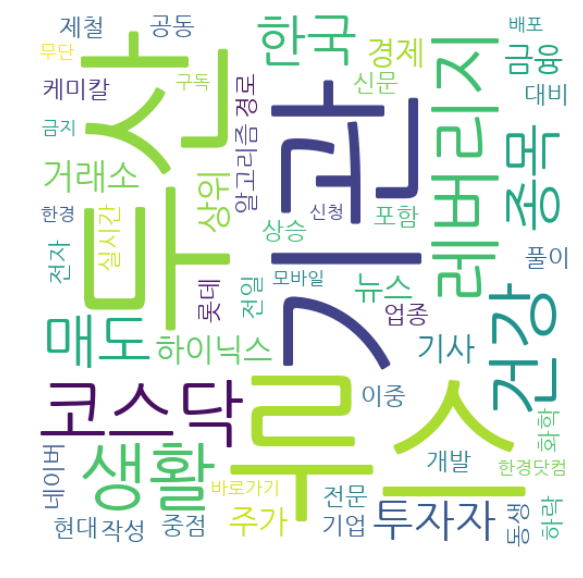

In [14]:
%matplotlib inline
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path="data/NanumGothic.ttf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()